In [31]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

# Setting Testing

9
2.4444444444444446


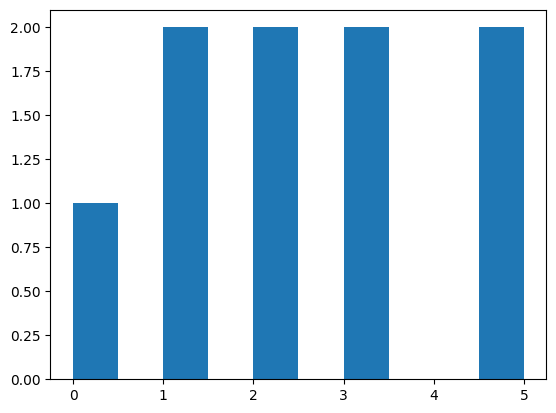

In [5]:
# volatage is 1200 V, Lower PMT, Integral Time of 2 secs, St90
Pcounts = [1,1,5,3,2,0,3,2,5]
print(len(Pcounts))
print(np.mean(Pcounts))
plt.figure()
plt.hist(Pcounts)
plt.show()

100
0.8


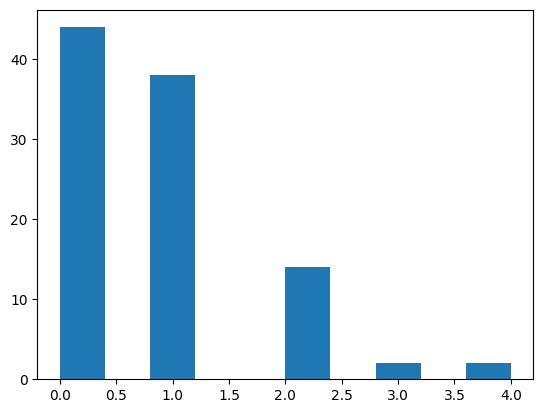

In [6]:
#voltage is 1200V, Integral time is 1 sec
Pcounts = [0,2,2,0,1,0,2,2,1,2,
           1,2,0,0,0,0,0,0,4,1,
           0,0,1,0,1,1,1,0,0,0,
           2,1,0,0,0,2,1,1,2,2,
           0,0,0,0,1,0,1,0,1,0,
           1,1,0,0,1,1,1,0,1,1,
           1,0,0,0,0,1,1,1,0,2,
           3,1,1,1,0,0,0,0,0,0,
           2,0,1,2,1,0,1,0,1,1,
           0,1,1,2,1,0,4,3,1,1]
print(len(Pcounts))
print(np.mean(Pcounts))
plt.figure()
plt.hist(Pcounts)
plt.show()

47
0.9787234042553191


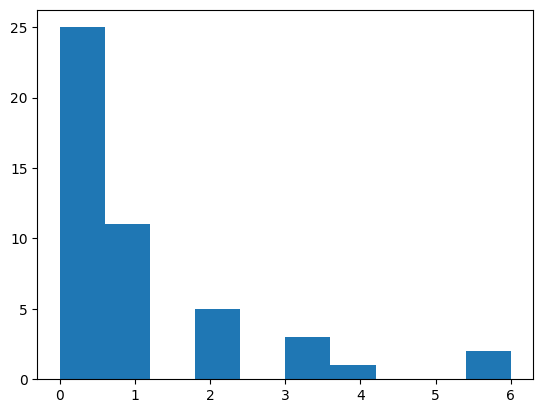

In [7]:
#voltage is 1225V, Integral time is 1 sec
Pcounts = [1,2,2,2,1,4,1,1,1,2,
           1,2,0,0,0,3,6,3,1,3,
           6,1,0,0,1,0,0,0,0,0,
           1,0,0,0,0,0,0,0,1,0,
           0,0,0,0,0,0,0]
print(len(Pcounts))
print(np.mean(Pcounts))
plt.figure()
plt.hist(Pcounts)
plt.show()

# Data Collection

100
1.82


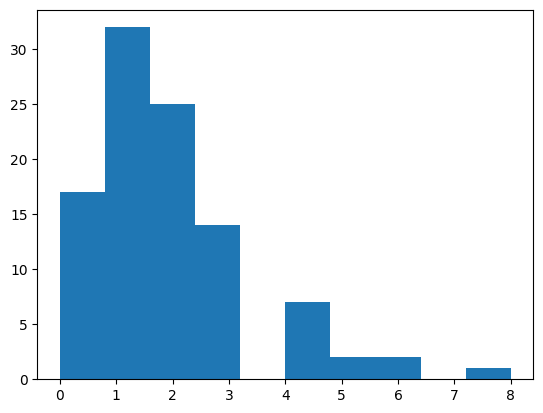

In [8]:
#voltage is 1200V, Integral time is 2 sec
counts1 = [1,2,2,2,2,1,2,5,2,3,
           1,2,3,0,0,2,4,1,1,3,
           2,1,2,2,1,0,4,2,1,0,
           1,0,1,1,3,4,3,0,5,0,
           3,0,2,8,3,1,0,2,0,3,
           1,2,0,2,1,0,1,1,1,2,
           4,2,3,3,3,3,1,0,1,1,
           2,3,1,4,1,1,3,1,4,1,
           4,6,1,0,2,1,2,0,6,2,
           2,1,1,2,1,2,0,0,1,1
           ]
print(len(counts1))
print(np.mean(counts1))
plt.figure()
plt.hist(counts1)
plt.show()

100
10.82


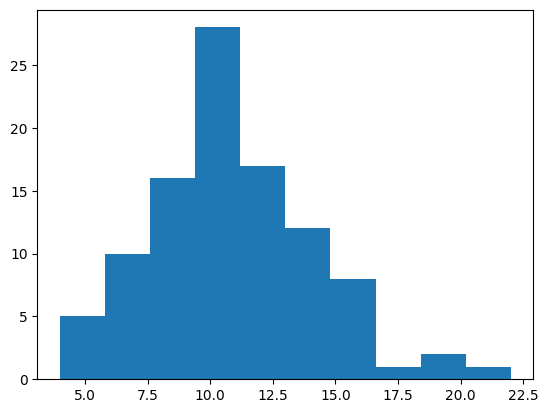

In [9]:
# gaussian (high) counts 1250, 2 sec interval
counts10 = [11,14,10,6,11,8,11,11,13,7,
           8,9,12,14,7,5,8,12,13,8,9,11,
           5,10,12,12,12,12,11,7,9,10,
           4,8,7,15,7,8,12,14,12,15,10,
           14,11,7,6,12,12,15,16,8,10,
           12,10,10,13,8,11,22,14,19,
           8,10,10,11,8,10,10,6,16,16,
           15,10,4,14,10,10,11,10,14,20,
           8,12,16,12,10,10,12,12,13,
           7,12,17,9,10,13,12,9,5


]
print(len(counts10))
print(np.mean(counts10))
plt.figure()
plt.hist(counts10)
plt.show()



100
109.2


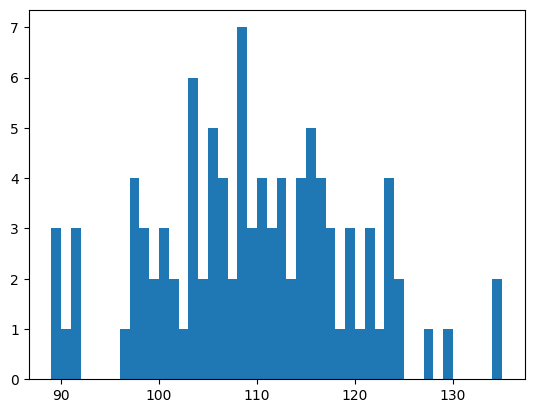

In [10]:
# guassian counts for 1400V interval 3 seconds
counts100 = [100,98,98,124,118,109,124,111,89,119,
           123,114,106,108,105,112,117,111,121,
           89,115,105,108,97,107,100,115,104,
           97,123,91,116,91,106,103,106,117,
           89,110,110,105,123,116,103,127,116,
           112,129,103,123,101,113,102,134,121,
           110,114,115,119,107,114,99,91,98,
           108,103,119,113,101,108,117,111,
           103,105,90,112,108,103,115,110,
           106,100,122,109,108,121,108,99,
           120,116,112,114,96,105,109,104,
           115,97,97,135
]
print(len(counts100))
print(np.mean(counts100))
plt.figure()
plt.hist(counts100,bins=46)
plt.show()


# Data Analysis

## Statistics Comparision

In [18]:
datasetslist = [counts1,counts10,counts100]
datasets = np.empty((3,100))
for i, set in enumerate(datasetslist):
    datasets[i] = np.array(set)
    

In [24]:
means = np.mean(datasets,axis=1)

In [25]:
stds = np.std(datasets,axis=1)

In [30]:
np.abs((np.sqrt(means)-stds)/stds)*100

array([10.0137441 ,  0.4935493 ,  5.73249822])

In [29]:
np.abs((stds**2-means)/means)*100

array([23.49450549,  0.99445471, 10.54945055])

## Distribution Measures

In [43]:
def poisson(mean,x):
    x = np.array(x).astype(int)
    facts = sp.special.factorial(x)
    return ((mean**x)*(np.exp(-mean)))/(facts)

In [44]:
x = np.linspace(1,10,10).astype(int)
x

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [50]:
y = poisson(3,x)

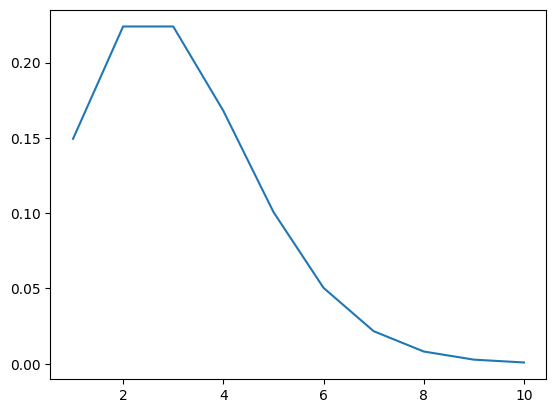

In [51]:
plt.plot(x,y)

In [66]:
testx1, testf1 = np.unique_counts(datasets[0])

In [67]:
testy1 = poisson(means[0],testx1)

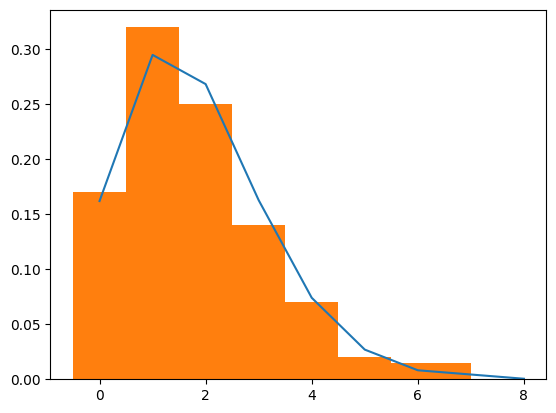

In [68]:
plt.figure()
plt.plot(testx1,testy1)
plt.hist(counts1,bins=testx1,density=True,align='left')
plt.show()

In [73]:
testf1/sum(testf1)

array([0.17, 0.32, 0.25, 0.14, 0.07, 0.02, 0.02, 0.01])

In [74]:
testy1

array([0.16202575, 0.29488687, 0.26834705, 0.16279721, 0.07407273,
       0.02696247, 0.00817862, 0.00048377])

In [77]:
np.abs((testy1-testf1/sum(testf1))/(testf1/sum(testf1)))*100

array([ 4.69073474,  7.84785416,  7.33881948, 16.2837211 ,  5.8181862 ,
       34.81236922, 59.10691467, 95.16234801])